### CICI 데이터 불러오기

In [1]:
import pandas as pd

ConcatedCICI = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/MLAC-dataset/encoded_ConcatedCICI.csv')

##### Benign은 삭제하기

In [40]:
ConcatedCICI.drop(ConcatedCICI[ConcatedCICI['label']==0].index, inplace=True)

In [42]:
del ConcatedCICI['label']

In [45]:
x_data = ConcatedCICI.drop(['attack_category'], axis=1)

In [46]:
x_data.head()

,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,tot_len_fwd_pkts,tot_len_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,...,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
12636,0.389389,0.877342,0.698699,0.713714,0.893987,0.767159,0.881636,0.0,0.947828,0.925538,...,0.694194,0.888388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12642,0.389389,0.875085,0.756757,0.713714,0.846870,0.852023,0.888889,0.0,0.854184,0.910484,...,0.643143,0.888388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12699,0.389389,0.092593,0.307307,0.139139,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.888388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12711,0.389389,0.879267,0.698699,0.657157,0.891724,0.734644,0.920469,0.0,0.942913,0.943908,...,0.643143,0.888388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12790,0.389389,0.874360,0.698699,0.625125,0.891891,0.734644,0.920652,0.0,0.943249,0.944186,...,0.643143,0.888388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### PCA

In [47]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components = 2)
pca2_result = pca2.fit_transform(x_data)
print(pca2.explained_variance_ratio_)

[0.50747934 0.21773082]


In [48]:
colors = ['black', 'white', 'red', 'lime', 'blue', 'yellow', 'cyan', 'magenta', 'silver', 'gray', 'maroon', 'olive', 'green', 'purple', 'teal', 'navy', 'indigo', 'aquamarine', 'azure', 'beige', 'bisque', 'brown', 'chartreuse', 'coral', 'cornsilk', 'violet']
# keys = ['BENIGN', 'Web Attack – Brute Force', 'Web Attack – XSS', 'Web Attack – Sql Injection', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed', 'FTP-Patator', 'SSH-Patator', 'DDoS', 'PortScan', 'Bot', 'Infiltration', 'Normal', 'DoS', 'Exploits', 'Reconnaissance', 'Generic', 'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis', 'DoS Slowhttptest']
# color_dict = dict(zip(keys, colors))

In [51]:
attacks = list(ConcatedCICI['attack_category'].unique())
print(attacks)

[20, 22, 21, 9, 8, 7, 6, 14, 11, 18, 4, 16, 3, 15, 5, 10, 17, 13, 19, 12, 23, 2, 1]


In [53]:
import numpy as np
attacks = list(np.arange(1,24))
print(attacks)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [54]:
print(len(pca2_result))

704929


In [55]:
ConcatedCICI['attack_category'].value_counts()

7     231073
16    158930
4     128027
10     59131
12     25621
5      22493
13     18100
17     15203
6      10293
11      7938
18      5897
9       5796
8       5499
2       4070
3       1966
1       1695
20      1507
19       865
22       652
23       105
15        36
21        21
14        11
Name: attack_category, dtype: int64

Text(0.5, 1.0, 'PCA of Concated CICI dataset')

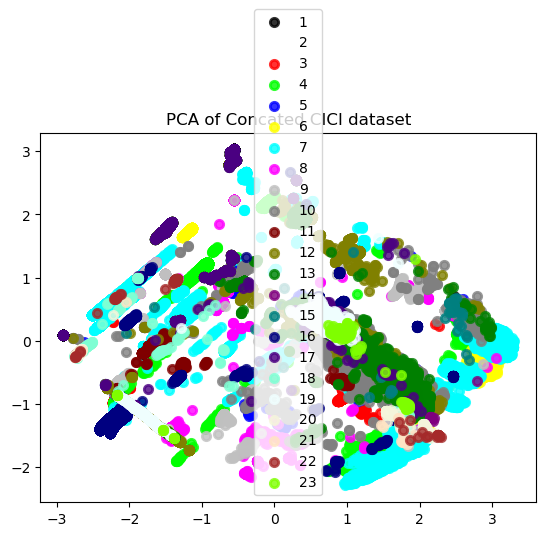

In [56]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
y = ConcatedCICI['attack_category']

for color, attack in zip(colors, attacks):
    # print(color, attack)
    plt.scatter(
        pca2_result[y == attack, 0], pca2_result[y == attack, 1], color=color, alpha=0.8, lw=lw, label=attack
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Concated CICI dataset")

### T-SNE

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [58]:
pca = PCA(n_components = 50)
pca_result = pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)

[5.07479342e-01 2.17730820e-01 7.76719122e-02 4.84956205e-02 4.02961656e-02 2.80954250e-02 1.62591975e-02 1.01090533e-02 9.53353327e-03 7.09221631e-03 5.30401325e-03 4.95472350e-03 4.13109689e-03 3.23013249e-03 3.15181436e-03 2.62593058e-03 1.92028624e-03 1.57205736e-03 1.32372269e-03 1.19899019e-03 1.11721230e-03 9.45945572e-04 8.41477324e-04 7.32370554e-04 6.69347054e-04 5.29828837e-04 4.44716916e-04 3.84140672e-04 3.13697521e-04 2.64322227e-04 2.35374075e-04 2.25070550e-04 1.59859297e-04 1.40987190e-04 1.39939101e-04 1.09068390e-04 9.30578917e-05 8.77196143e-05 6.70602746e-05 5.60218411e-05 4.70676395e-05 3.61823936e-05 3.04452931e-05 2.65059847e-05 1.94098840e-05 1.74445329e-05 1.66158592e-05 1.41239453e-05 1.37449896e-05 1.22657166e-05]


In [61]:
print(pca_result.shape)

(704929, 50)


In [67]:
x_pca = pd.DataFrame(pca_result)

In [68]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.729670,-1.390695,1.021181,0.158825,-0.094230,-0.801043,0.288175,0.230599,-0.057788,-0.712984,...,0.034374,0.026565,-0.033195,0.012012,0.004909,-0.021136,0.019300,0.003105,0.007439,0.008995
1,1.869862,-1.369446,0.917195,0.070692,-0.196576,-0.920662,-0.101455,0.224529,0.057433,-0.729782,...,-0.044826,0.016542,0.035667,-0.005019,0.009607,-0.011672,0.010530,-0.027243,-0.008432,0.002871
2,-2.681157,-0.167547,-0.020248,-0.848719,-0.249528,0.775745,0.069655,-0.065279,-0.195508,0.282286,...,0.001956,0.004497,0.006793,0.013065,-0.015292,-0.017851,0.002563,0.024524,-0.003276,0.009319
3,1.713756,-1.140078,1.058057,-0.000289,-0.111586,-0.911624,0.214042,0.313061,-0.022522,-0.919220,...,0.035933,0.023461,-0.017975,0.007551,-0.004080,-0.011649,-0.005351,0.002877,-0.015130,-0.011674
4,1.607152,-1.096412,0.979839,0.012921,-0.068600,-0.939869,0.116768,0.259197,-0.048288,-0.937204,...,0.033725,0.020807,-0.005969,-0.000631,-0.000400,-0.016601,-0.010280,-0.001631,-0.031534,-0.014572


In [70]:
len(x_pca)

704929

In [71]:
len(ConcatedCICI['attack_category'])

704929

In [76]:
y_data = ConcatedCICI['attack_category'].reset_index()

In [77]:
pca_data = pd.concat([x_pca,y_data], axis=1)

In [81]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,index,attack_category
0,1.729670,-1.390695,1.021181,0.158825,-0.094230,-0.801043,0.288175,0.230599,-0.057788,-0.712984,...,-0.033195,0.012012,0.004909,-0.021136,0.019300,0.003105,0.007439,0.008995,12636,20
1,1.869862,-1.369446,0.917195,0.070692,-0.196576,-0.920662,-0.101455,0.224529,0.057433,-0.729782,...,0.035667,-0.005019,0.009607,-0.011672,0.010530,-0.027243,-0.008432,0.002871,12642,20
2,-2.681157,-0.167547,-0.020248,-0.848719,-0.249528,0.775745,0.069655,-0.065279,-0.195508,0.282286,...,0.006793,0.013065,-0.015292,-0.017851,0.002563,0.024524,-0.003276,0.009319,12699,20
3,1.713756,-1.140078,1.058057,-0.000289,-0.111586,-0.911624,0.214042,0.313061,-0.022522,-0.919220,...,-0.017975,0.007551,-0.004080,-0.011649,-0.005351,0.002877,-0.015130,-0.011674,12711,20
4,1.607152,-1.096412,0.979839,0.012921,-0.068600,-0.939869,0.116768,0.259197,-0.048288,-0.937204,...,-0.005969,-0.000631,-0.000400,-0.016601,-0.010280,-0.001631,-0.031534,-0.014572,12790,20


In [82]:
del pca_data['index']

In [83]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,attack_category
0,1.729670,-1.390695,1.021181,0.158825,-0.094230,-0.801043,0.288175,0.230599,-0.057788,-0.712984,...,0.026565,-0.033195,0.012012,0.004909,-0.021136,0.019300,0.003105,0.007439,0.008995,20
1,1.869862,-1.369446,0.917195,0.070692,-0.196576,-0.920662,-0.101455,0.224529,0.057433,-0.729782,...,0.016542,0.035667,-0.005019,0.009607,-0.011672,0.010530,-0.027243,-0.008432,0.002871,20
2,-2.681157,-0.167547,-0.020248,-0.848719,-0.249528,0.775745,0.069655,-0.065279,-0.195508,0.282286,...,0.004497,0.006793,0.013065,-0.015292,-0.017851,0.002563,0.024524,-0.003276,0.009319,20
3,1.713756,-1.140078,1.058057,-0.000289,-0.111586,-0.911624,0.214042,0.313061,-0.022522,-0.919220,...,0.023461,-0.017975,0.007551,-0.004080,-0.011649,-0.005351,0.002877,-0.015130,-0.011674,20
4,1.607152,-1.096412,0.979839,0.012921,-0.068600,-0.939869,0.116768,0.259197,-0.048288,-0.937204,...,0.020807,-0.005969,-0.000631,-0.000400,-0.016601,-0.010280,-0.001631,-0.031534,-0.014572,20


In [84]:
print(len(pca_data))

704929


In [ ]:
pca_data.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/EDA/pca_data.csv', index=False)

In [1]:
from plotnine import *

In [3]:
import pandas as pd
pca_data = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/EDA/pca_data.csv')

In [4]:
X = pca_data.drop(['attack_category'], axis=1)
Y = pca_data['attack_category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=34)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [18]:
t0 = time()
tsne = manifold.TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=80,
        n_iter=250,
)
tsne_result = tsne.fit_transform(X_test)
t1 = time()

In [19]:
df_tsne = pd.DataFrame()
df_tsne['x'] = tsne_result[:,0]
df_tsne['y'] = tsne_result[:,1]
df_tsne['val'] = (y_test/10).reset_index(drop = True)

In [20]:
df_tsne.head()

,x,y,val
0,7.282748,-0.338554,0.7
1,-5.148454,8.131866,0.6
2,-4.315804,9.933166,1.6
3,9.362184,-3.255582,1.0
4,-4.168647,16.298643,1.6


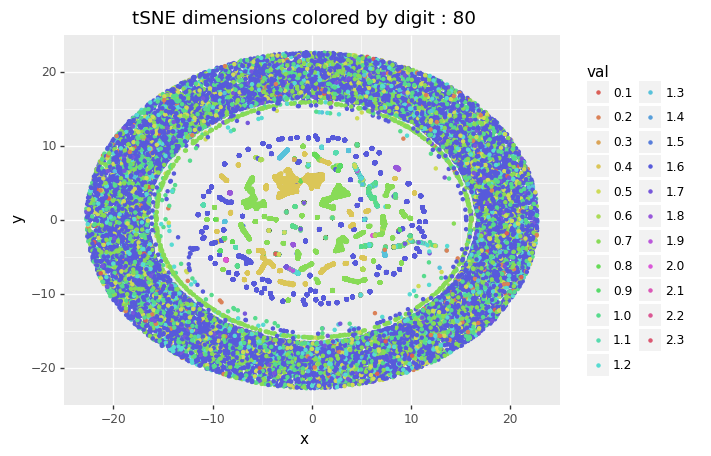

<ggplot: (8787117657242)>

In [31]:
#perplex = 
chart = (ggplot( df_tsne, aes(x='x', y='y', color='val'))
    + geom_point(size=0.8,alpha=1)
    + ggtitle("tSNE dimensions colored by digit : 80"))
    
chart